In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dask.dataframe as dd
from matplotlib import rcParams

# Load Data


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
df_ams_weekday = pd.read_csv('amsterdam_weekdays.csv')
df_ams_weekend = pd.read_csv('amsterdam_weekends.csv')
df_ath_weekday = pd.read_csv('athens_weekdays.csv')
df_ath_weekend = pd.read_csv('athens_weekends.csv')
df_bar_weekday = pd.read_csv('barcelona_weekdays.csv')
df_bar_weekend = pd.read_csv('barcelona_weekends.csv')
df_ber_weekday = pd.read_csv('berlin_weekdays.csv')
df_ber_weekend = pd.read_csv('berlin_weekends.csv')
df_bud_weekday = pd.read_csv('budapest_weekdays.csv')
df_bud_weekend = pd.read_csv('budapest_weekends.csv')
df_lis_weekday = pd.read_csv('lisbon_weekdays.csv')
df_lis_weekend = pd.read_csv('lisbon_weekends.csv')
df_lon_weekday = pd.read_csv('london_weekdays.csv')
df_lon_weekend = pd.read_csv('london_weekends.csv')
df_par_weekday = pd.read_csv('paris_weekdays.csv')
df_par_weekend = pd.read_csv('paris_weekends.csv')
df_rom_weekday = pd.read_csv('rome_weekdays.csv')
df_rom_weekend = pd.read_csv('rome_weekends.csv')
df_vie_weekday = pd.read_csv('vienna_weekdays.csv')
df_vie_weekend = pd.read_csv('vienna_weekends.csv')

In [ ]:
df_ams_weekday['city'] = 'amsterdam'
df_ams_weekday['is_weekend'] = 0
df_ams_weekend['city'] = 'amsterdam'
df_ams_weekend['is_weekend'] = 1
df_ath_weekday['city'] = 'athens'
df_ath_weekday['is_weekend'] = 0
df_ath_weekend['city'] = 'athens'
df_ath_weekend['is_weekend'] = 1
df_bar_weekday['city'] = 'barcelona'
df_bar_weekday['is_weekend'] = 0
df_bar_weekend['city'] = 'barcelona'
df_bar_weekend['is_weekend'] = 1
df_ber_weekday['city'] = 'berlin'
df_ber_weekday['is_weekend'] = 0
df_ber_weekend['city'] = 'berlin'
df_ber_weekend['is_weekend'] = 1
df_bud_weekday['city'] = 'budapest'
df_bud_weekday['is_weekend'] = 0
df_bud_weekend['city'] = 'budapest'
df_bud_weekend['is_weekend'] = 1
df_lis_weekday['city'] = 'lisbon'
df_lis_weekday['is_weekend'] = 0
df_lis_weekend['city'] = 'lisbon'
df_lis_weekend['is_weekend'] = 1
df_lon_weekday['city'] = 'london'
df_lon_weekday['is_weekend'] = 0
df_lon_weekend['city'] = 'london'
df_lon_weekend['is_weekend'] = 1
df_par_weekday['city'] = 'paris'
df_par_weekday['is_weekend'] = 0
df_par_weekend['city'] = 'paris'
df_par_weekend['is_weekend'] = 1
df_rom_weekday['city'] = 'rome'
df_rom_weekday['is_weekend'] = 0
df_rom_weekend['city'] = 'rome'
df_rom_weekend['is_weekend'] = 1
df_vie_weekday['city'] = 'vienna'
df_vie_weekday['is_weekend'] = 0
df_vie_weekend['city'] = 'vienna'
df_vie_weekend['is_weekend'] = 1

In [ ]:
df_combined = pd.concat([df_ams_weekday, df_ams_weekend, df_ath_weekday, df_ath_weekend, df_bar_weekday, df_bar_weekend, df_ber_weekday, df_ber_weekend, df_bud_weekday, df_bud_weekend, df_lis_weekday, df_lis_weekend, df_lon_weekday, df_lon_weekend, df_par_weekday, df_par_weekend, df_rom_weekday, df_rom_weekend, df_vie_weekday, df_vie_weekend,], ignore_index=True)
df_combined.to_csv('airbnb_europe.csv', index=False)

In [ ]:
pd.read_csv('airbnb_europe.csv')

In [ ]:
df=pd.read_csv('airbnb_europe.csv', index_col=0)

# Descriptive Statistics

In [ ]:
df=pd.read_csv('airbnb_europe.csv', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  51707 non

In [ ]:
df.describe()

realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000   
25%              9.000000                   90.000000      1.00000   
50%             10.000000                   95.000000      1.00000   
75%             10.000000                   99.000000      1.00000   
max             10.000000                  100.000000     10.00000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat    is_weekend  
count  51707.000000     51707.000000  51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128      0.506837  
std      497.920226        17.804096      9.799725      5.249263      0.499958  
min       19.576924         0.592757     -9.226340     37.953000      0.000000  
25%      250.854114         8.751480     -0.072500     41.399510      0.000000  
50%      522.052783        17.542238      4.873000     47.506690      1.000000  
75%      832.628988        32.964603     13.518825     51.471885      1.000000  
max     6696.156772       100.000000     23.786020     52.641410      1.000000

1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
Jawab : pada kolom person_capacity memiliki tipe data yang kurang sesuai, seharusnya adalah integer karena jumlah orang bernilai bulangan bulat

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Jawab : tidak terdapat kolom yang memiliki nilai kosong.

3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
Jawab : ada, yaitu pada kolom bedrooms yang menjelaskan tentang banyaknya kamar tidur di airbnb memiliki nilai minimum 0 (sepertinya range 1-10 menunjukkan tipe bedrooms)
lalu pada person_capacity,multi, biz tipe nya float /int64 padahal isinya angka yang memberikan representasi kategorikal  (namun tidak perlu diubah tipenya agar memudahkan encoding tapi dimasukkan ke tipe kategorikal)





In [ ]:
properties_without_bedrooms = df[df['bedrooms'] == 0]
properties_without_bedrooms


realSum        room_type  room_shared  room_private  \
Unnamed: 0                                                           
36          310.969465  Entire home/apt        False         False   
44          350.104281     Private room        False          True   
48          298.783774     Private room        False          True   
98          344.245776  Entire home/apt        False         False   
106         232.231153     Private room        False          True   
...                ...              ...          ...           ...   
1747        186.522684  Entire home/apt        False         False   
1760        185.353996  Entire home/apt        False         False   
1768        233.971437  Entire home/apt        False         False   
1778        187.691373  Entire home/apt        False         False   
1785        393.848024     Private room        False          True   

            person_capacity  host_is_superhost  multi  biz  \
Unnamed: 0                                                   
36                      2.0              False      1    0   
44                      2.0              False      1    0   
48                      2.0               True      0    0   
98                      2.0              False      0    0   
106                     2.0              False      0    0   
...                     ...                ...    ...  ...   
1747                    2.0              False      0    1   
1760                    2.0              False      0    1   
1768                    3.0               True      0    1   
1778                    4.0              False      1    0   
1785                    3.0              False      0    0   

            cleanliness_rating  guest_satisfaction_overall  ...      dist  \
Unnamed: 0                                                  ...             
36                         9.0                        94.0  ...  4.147087   
44                        10.0                        91.0  ...  1.097869   
48                         9.0                        94.0  ...  4.224209   
98                         7.0                        82.0  ...  4.157070   
106                       10.0                        97.0  ...  3.716679   
...                        ...                         ...  ...       ...   
1747                      10.0                        80.0  ...  3.411767   
1760                      10.0                        80.0  ...  2.783129   
1768                      10.0                        96.0  ...  2.124124   
1778                       8.0                        84.0  ...  0.843274   
1785                      10.0                        50.0  ...  0.456126   

            metro_dist  attr_index  attr_index_norm  rest_index  \
Unnamed: 0                                                        
36            0.038355  118.778885         6.289421  151.376393   
44            0.956928  293.060670        15.517757  426.571886   
48            1.519311  108.745892         5.758167  138.786731   
98            0.101232  118.848010         6.293081  151.478276   
106           1.556963  103.661513         5.488946  129.691801   
...                ...         ...              ...         ...   
1747          0.429864  104.416080         7.477591  144.884159   
1760          0.451776  114.682992         8.212839  176.563577   
1768          0.197917  143.100294        10.247899  226.155790   
1778          0.415329  170.839243        12.234379  298.284212   
1785          0.236242  235.502823        16.865158  478.015794   

            rest_index_norm       lng       lat       city is_weekend  
Unnamed: 0                                                             
36                10.548125   4.92058  52.33997  amsterdam          0  
44                29.724143   4.88774  52.38254  amsterdam          0  
48                 9.670859   4.93986  52.34829  amsterdam          0  
98                10.555224   4.91979  52.33963  amsterdam     

# Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  51707 non

In [ ]:
cats_col = ['room_type','room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'bedrooms', 'city', 'is_weekend']
nums_col = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist','attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

print("Categorical columns:", cats_col)
print("Numerical columns:", nums_col)

Categorical columns: ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'bedrooms', 'city', 'is_weekend']
Numerical columns: ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']


## Categorical Data


## Univariate Analysis Distribusi Kategorikal

In [ ]:
#Univariate Analysis on cats
for col in cats_col:
  print(f'''Value Count Kolom {col}''')
  print(df[col].value_counts())
  print()

Value Count Kolom room_type
room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64

Value Count Kolom room_shared
room_shared
False    51341
True       366
Name: count, dtype: int64

Value Count Kolom room_private
room_private
False    33014
True     18693
Name: count, dtype: int64

Value Count Kolom person_capacity
person_capacity
2.0    24333
4.0    14000
3.0     6165
6.0     4274
5.0     2935
Name: count, dtype: int64

Value Count Kolom host_is_superhost
host_is_superhost
False    38475
True     13232
Name: count, dtype: int64

Value Count Kolom multi
multi
0    36642
1    15065
Name: count, dtype: int64

Value Count Kolom biz
biz
0    33599
1    18108
Name: count, dtype: int64

Value Count Kolom bedrooms
bedrooms
1     36333
2      9290
0      4485
3      1477
4        96
5        10
9        10
6         2
10        2
8         2
Name: count, dtype: int64

Value Count Kolom city
city
london       9993
rome         9027
paris 

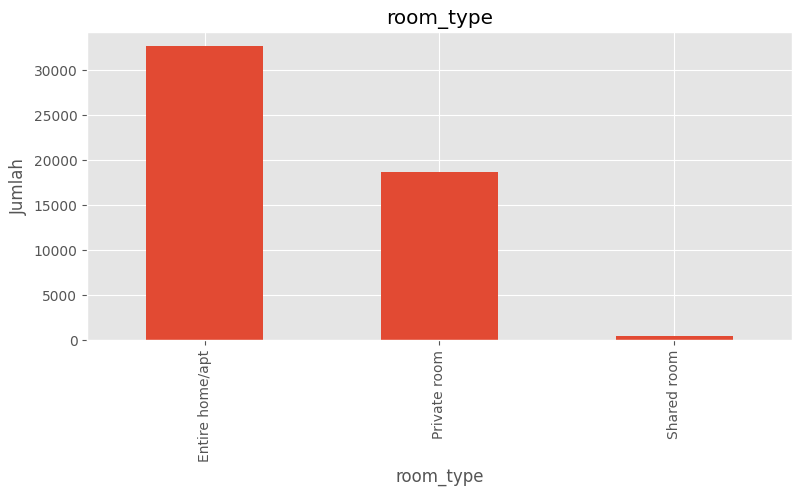

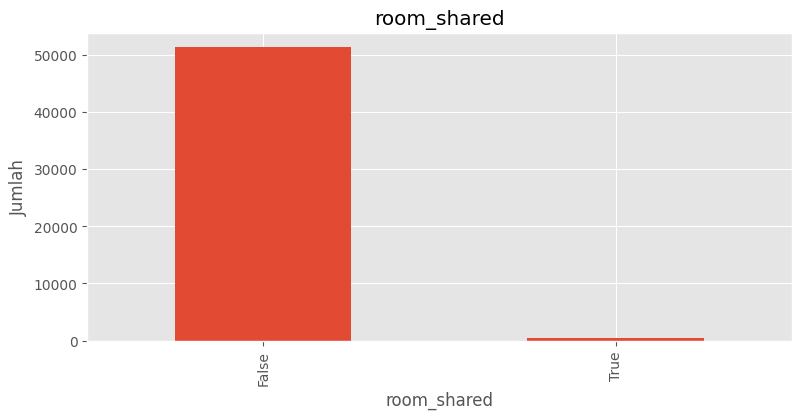

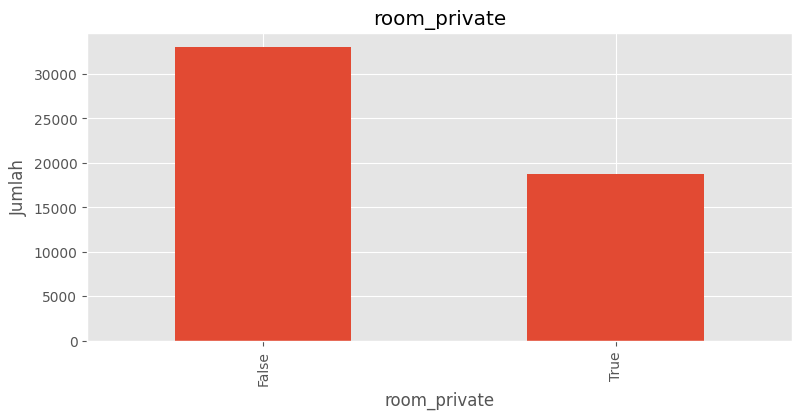

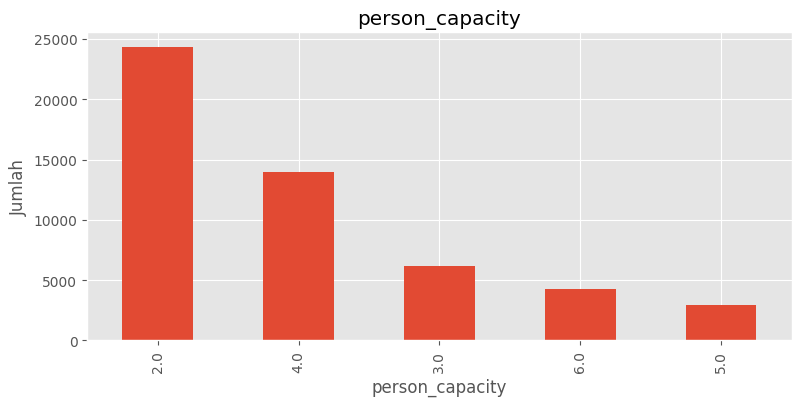

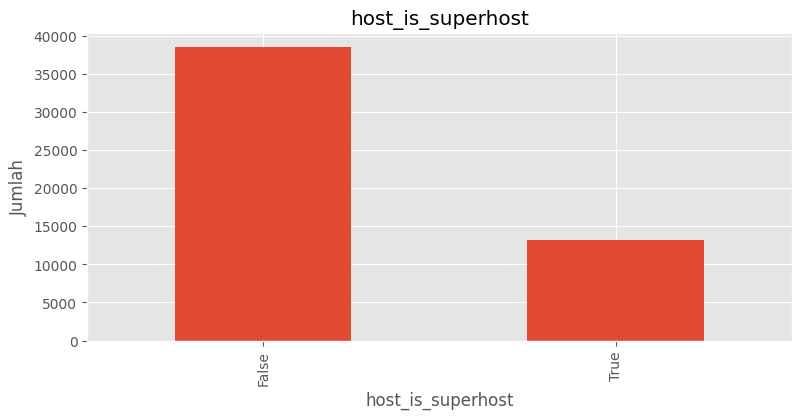

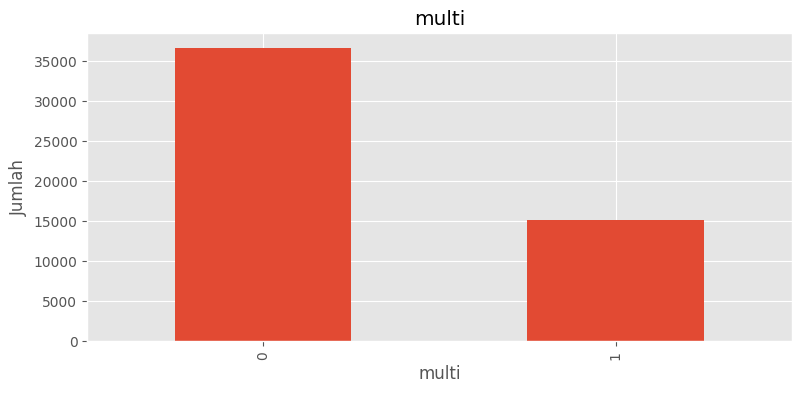

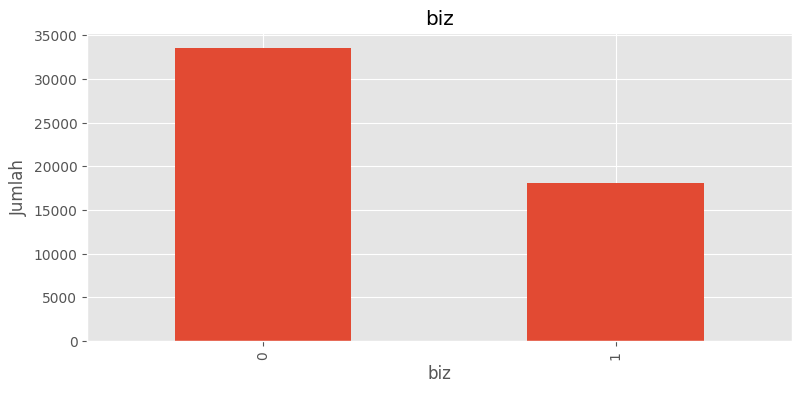

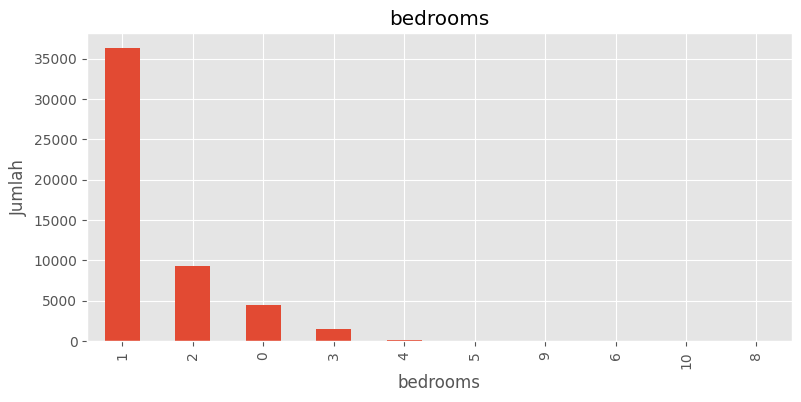

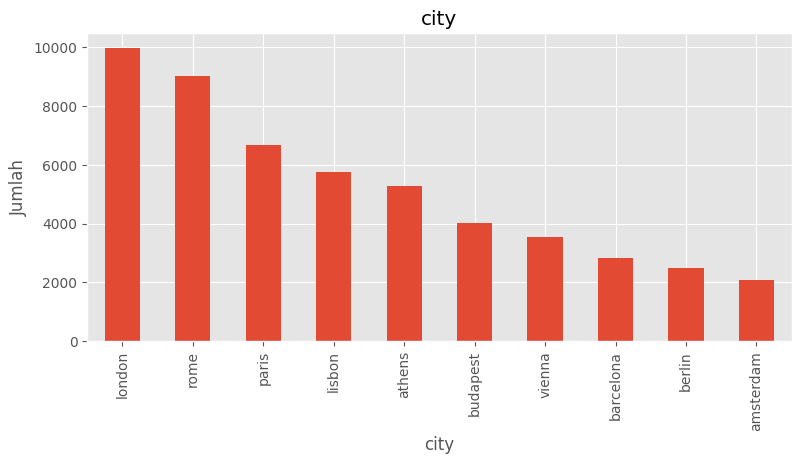

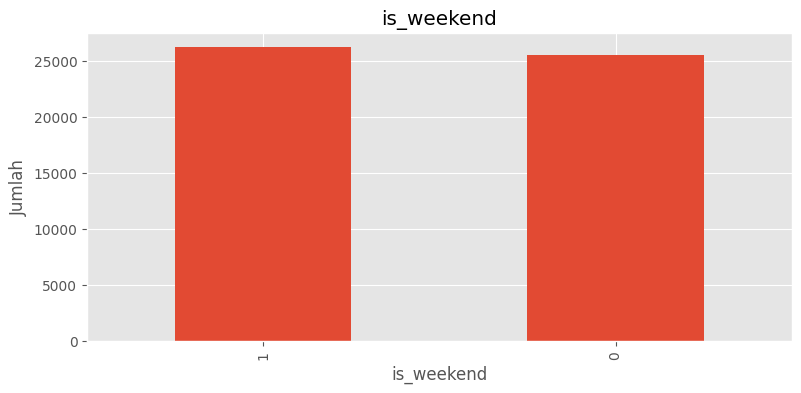

In [ ]:
# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cats_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.title(column)

Dari distribusi data kategorikal
1. Tipe kamar terdiri dari

- Entire home/apt
- Private room
- Shared room

  Namun tipe kamar di dominasi oleh entire home (airBnB bentuk sewa rumah/apartment)

2. room_shared terdiri dari

- true
- false
  
  room_shared mayoritas bernilai false menandakan banyak airBnB yang tidak menyediakan fasilitas berbagi kamar
3. room_private terdiri dari

- true
- false

  room_private mayoritas bernilai false menandakan tipe kamar airBnB sedikit yang tipe private
4. person_capacity terdiri dari

- 2 orang
- 3 orang
- 4 orang
- 5 orang
- 6 orang
  Kapasitas sewa didominasi oleh tipe kamar yang bisa disewa 2 orang

5. host_is_superhost terdiri dari

- true
- false
  
  host_is_superhost didominasi oleh nilai false artinya banyak tipe host yang memiliki performa standar dan belum menjadi superhost
6. multi terdiri dari nilai:
- 0
- 1

  multi didominasi nilai 0 artinya banyak tipe host yang hanya memiliki satu properti
7. biz terdiri dari nilai

- 0
- 1

  biz didominasi nilai 0 artinya banyak listing properti yang disewa bukan untuk keperluan bisnis
8. bedrooms terdiri dari

- 0
- 1
- 2
- 3
- 4
- 5
- 6
- 8
- 9
- 10
  bedrooms didominasi oleh nilai 1 artinya banyak host yang menyediakan sewa dengan tipe bedrooms 1

Tambahan kategori

9. city terdiri dari kota
- Amsterdam
- Athena
- Barcelona
- Berlin
- Budapest
- Lisbon
- London
- Paris
- Rome
- Vienna

  London memiliki listin airBnB terbanyak dibandingkan sejumlah kota lain di Eropa

10. is_weekend terdiri dari

- 1 (pemesanan di hari sabtu minggu)
- 0 (pemesanan di hari selain sabtu minggu)

  Tidak ada perbedaan yang terlalu signifikan meskipun banyak pemesanan airBnB banyak dilakukan di weekend




Kesimpulan pada kolom kategorikal:
- Semua data kategorikal perlu di encoding
- Banyak kolom yang distribusinya didominasi oleh satu nilai tertentu (misal false)


<ipython-input-13-c3f722422a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='room_type', data=df[df['bedrooms'] == 0], palette='viridis')


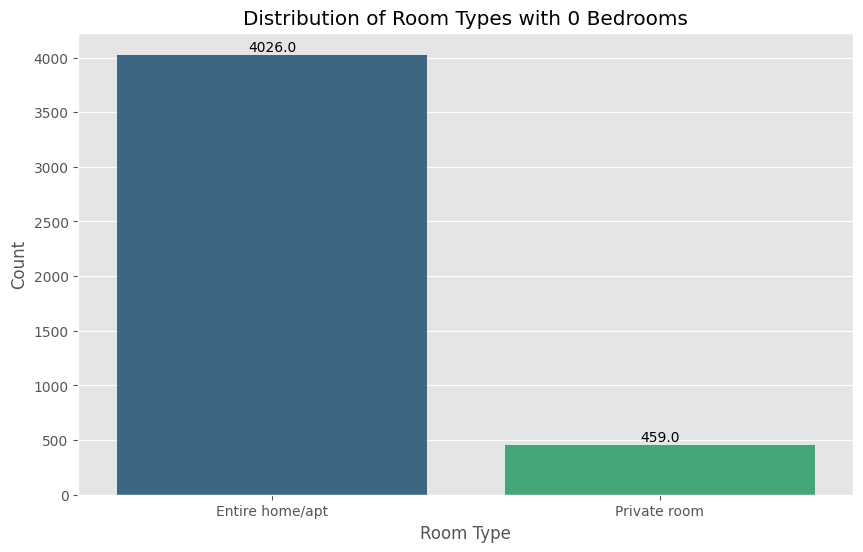

In [ ]:
# Distribution of Room Types with 0 bedrooms, including data labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='room_type', data=df[df['bedrooms'] == 0], palette='viridis')
plt.title('Distribution of Room Types with 0 Bedrooms')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

mayoritas entore home/apt yang tidak memiliki bedrooms, sementara sebanyak 459 private room tidak memiliki bedroom

<ipython-input-14-9cc7b0f4290a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=df, palette='viridis')


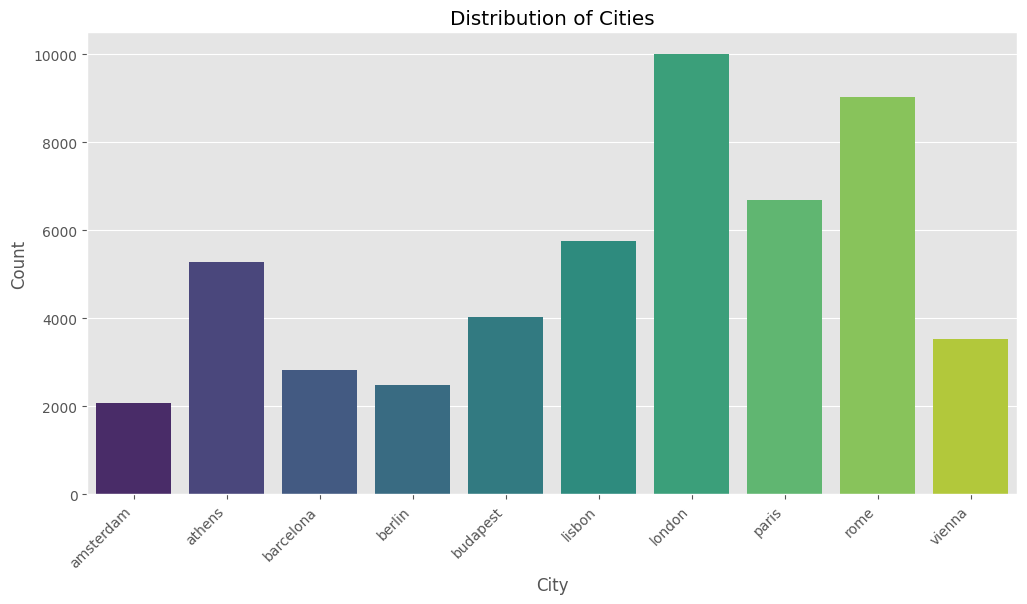

In [ ]:
# prompt: distribution of cities

# Distribution of Cities
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df, palette='viridis')
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

london memiliki jumlah listing properti tertinggi di benua eropa, sementara amsterdam memiliki jumlah listing properti terendah

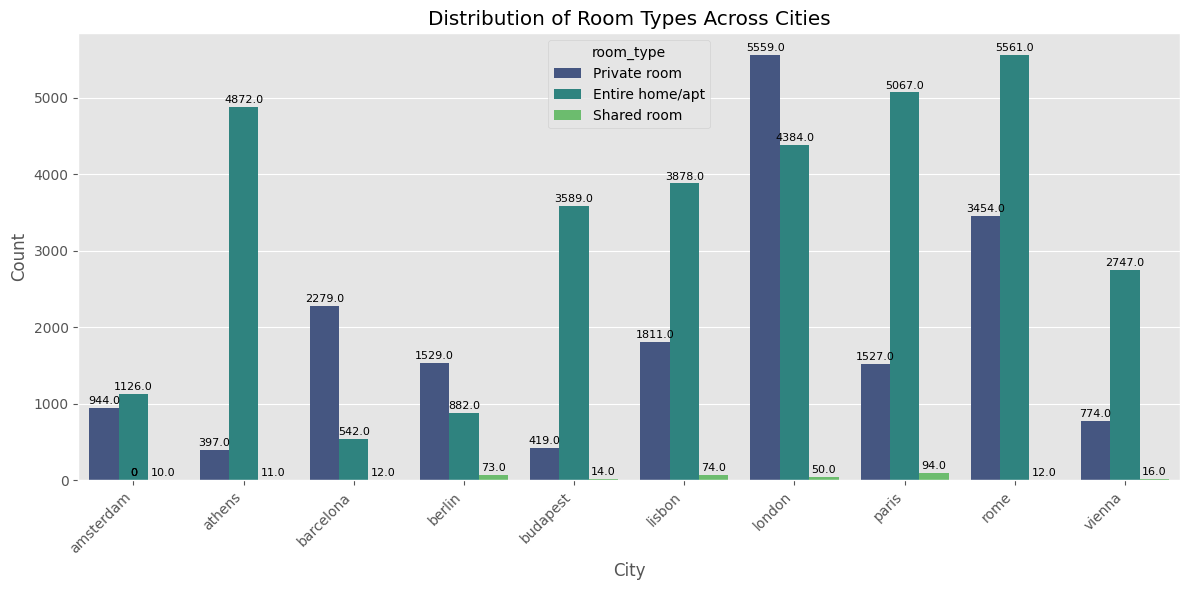

In [ ]:
# prompt: distribution of roomtypes across cities includes label for count

# Distribution of Room Types across Cities
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='city', hue='room_type', data=df, palette='viridis')
plt.title('Distribution of Room Types Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

di kota barcelona, berlin, dan london didominasi oleh tipe kamar private room, sementara di kota lainnya didominai oleh entire home/apt

## Univariate Analysis on Numerical

## Numerical Data

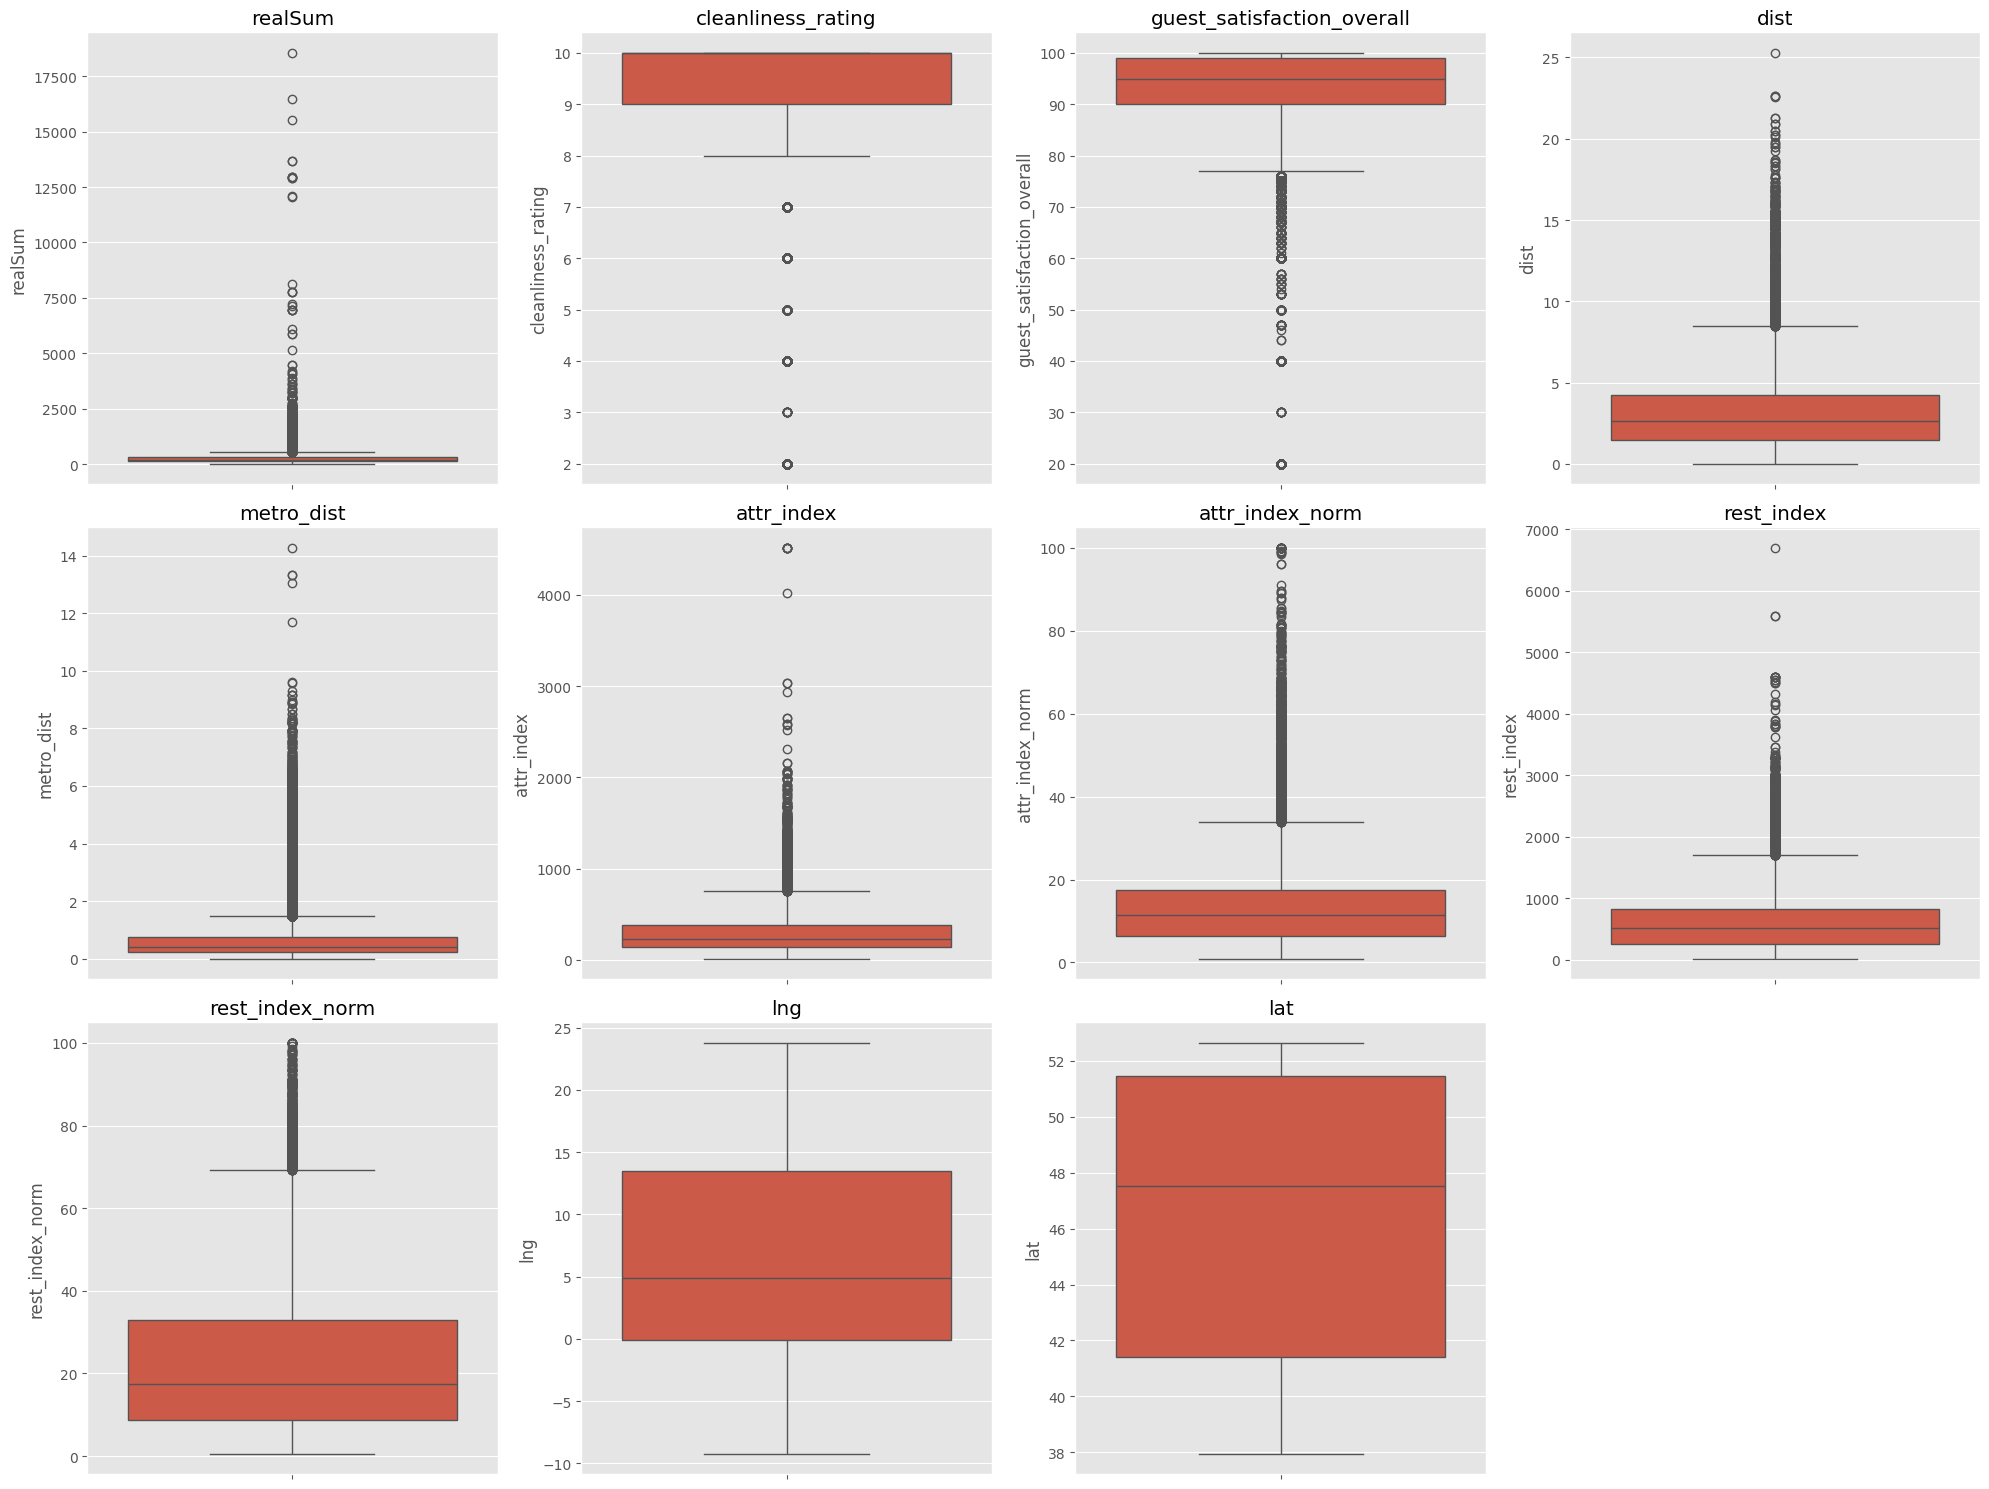

In [ ]:

# Assuming 'nums_col' contains the numerical column names from your previous code.
num_plots = len(nums_col)
num_rows = math.ceil(num_plots / 4)  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, col in enumerate(nums_col):
    plt.subplot(num_rows, 4, i + 1)  # Create subplots in a 4-column grid
    sns.boxplot(y=df[col], orient='v')  # Vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

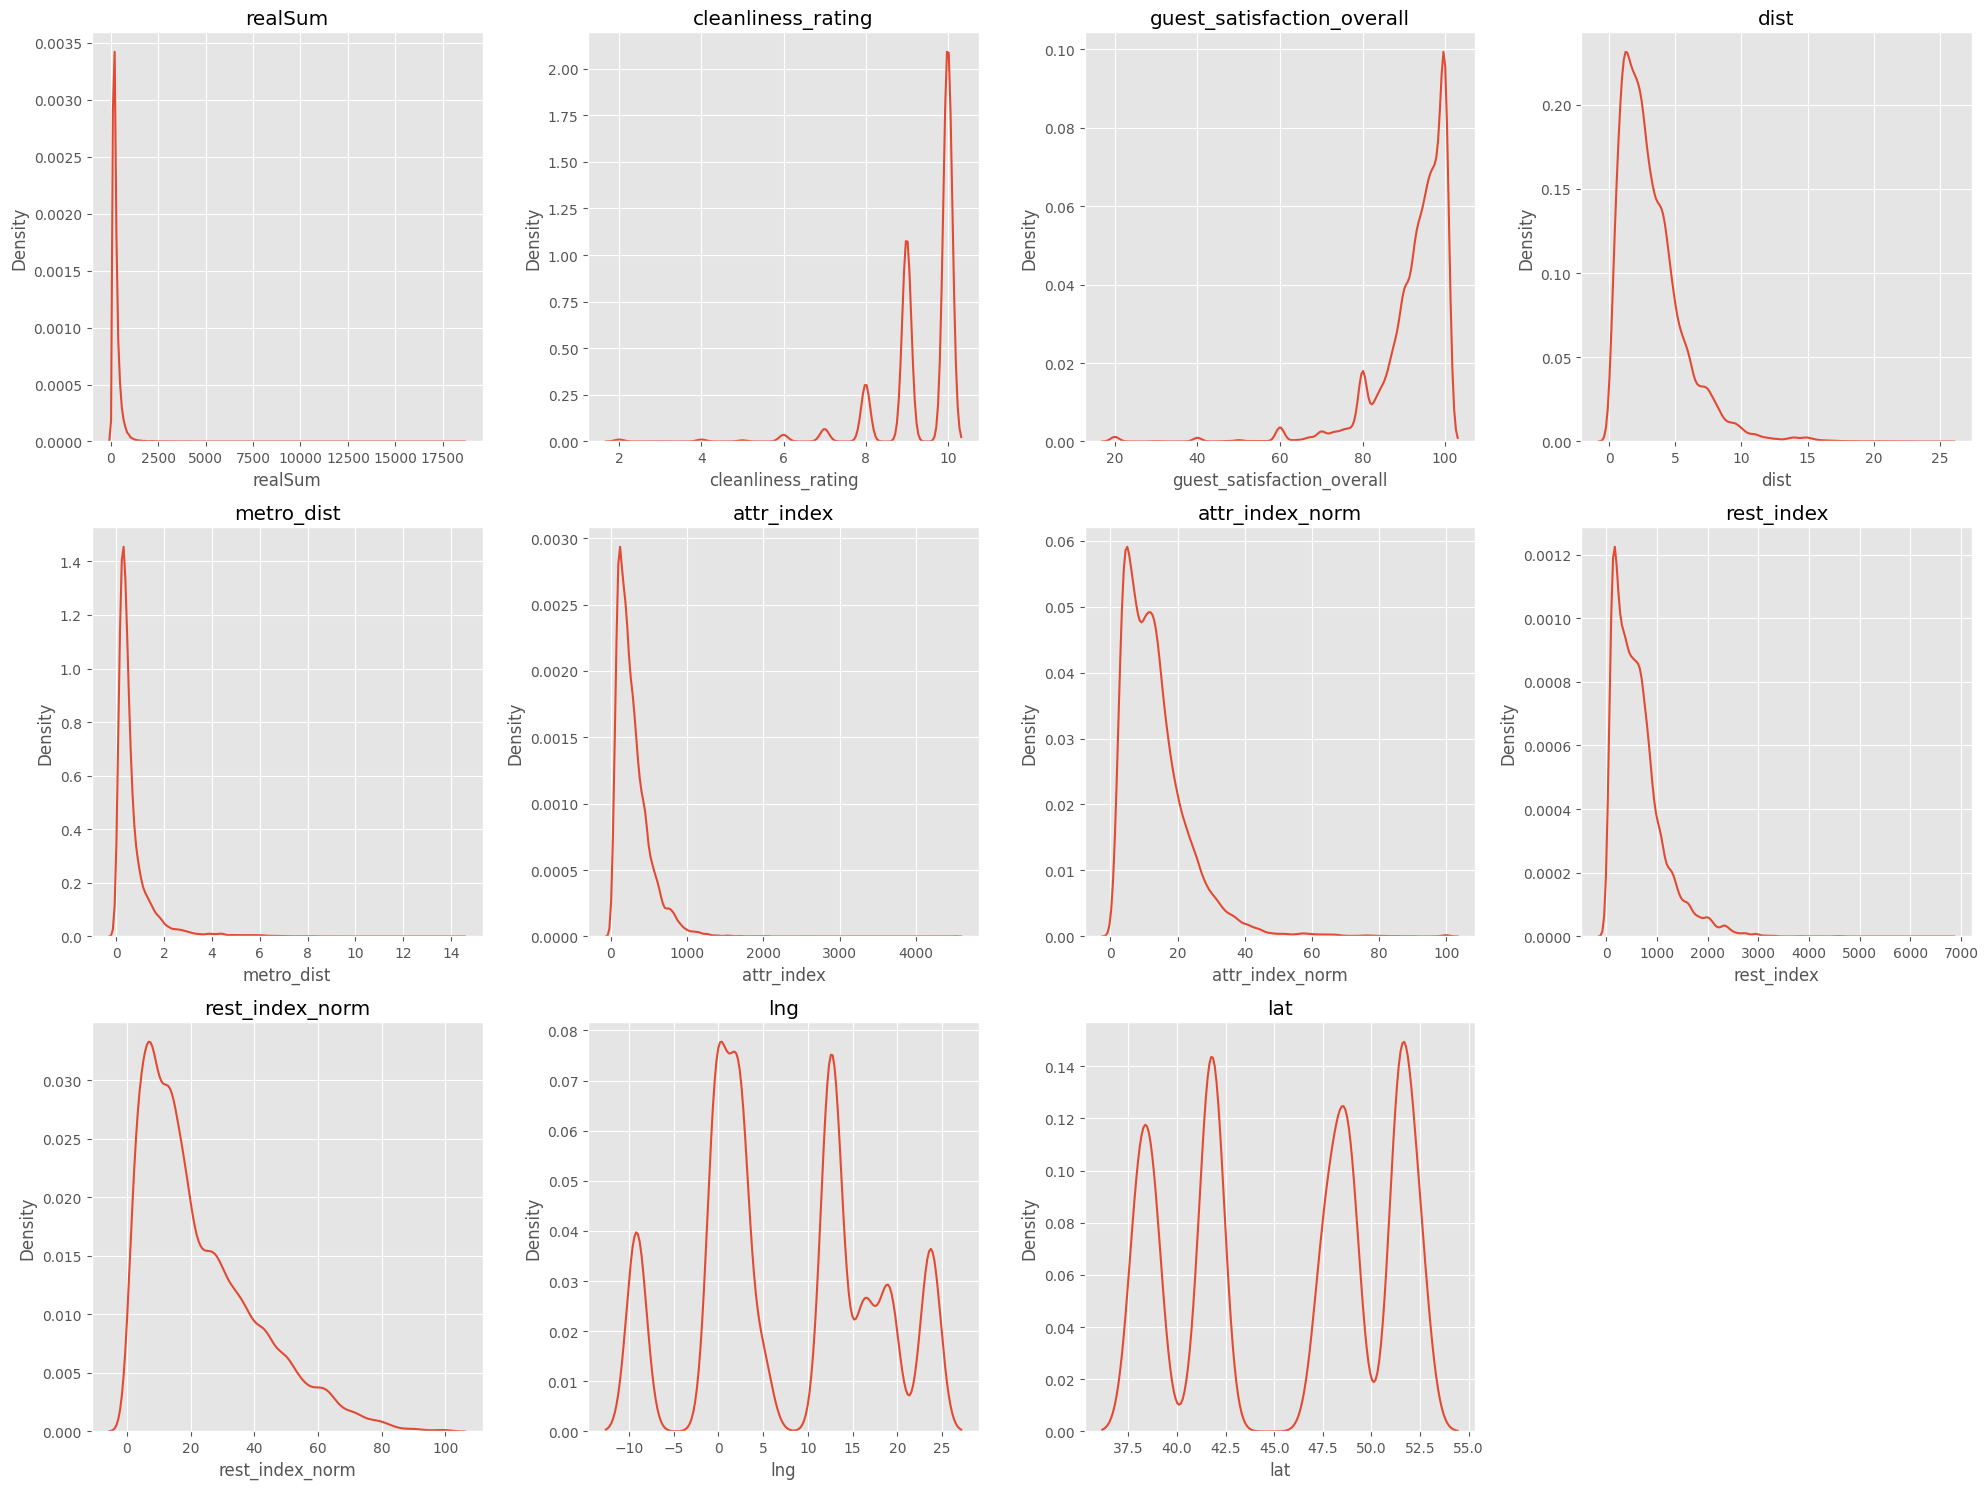

In [ ]:
# prompt: code to make kde plot for numerical data 4 figure in a row for each column

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'nums_col' and 'df' are defined from your previous code.

num_plots = len(nums_col)
num_rows = math.ceil(num_plots / 4)

plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(nums_col):
    plt.subplot(num_rows, 4, i + 1)
    sns.kdeplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
#Check descriptive on numerical variable
df[nums_col].describe()

realSum  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean     279.879591            9.390624                   92.628232   
std      327.948386            0.954868                    8.945531   
min       34.779339            2.000000                   20.000000   
25%      148.752174            9.000000                   90.000000   
50%      211.343089           10.000000                   95.000000   
75%      319.694287           10.000000                   99.000000   
max    18545.450285           10.000000                  100.000000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

Interpretasi

1. realSum (Harga Total Listing):
Distribusi harga kamar berkisar dari 148 euro - 320 euro dan terdapat  banyak outlier pada rentang harga tinggi (2500 - 17500 euro). Distribusi harga berbentuk right-skewed

2. cleanliness_rating: Rating kebersihan memiliki rentang  (9–10) dengan mayoritas listing memiliki nilai tinggi (>8). Ada beberapa outlier yang menunjukkan kamar dengan nilai kebersihan rendah (nilai 2-8). Distribusi cleanliness_rating berbentuk multi modal

3. guest_satisfaction_overall: Rating kepuasan tamu juga menunjukkan distribusi mirip dengan kebersihan, dengan mayoritas listing memiliki rating tinggi (90 - 100). Namun ada data rating kepuasan tamu yang menunjukkan outlier dengan rating sangat rendah (outlier < 75). Data guest_satisfaction_overall berbentuk left-skewed

4. dist (Jarak ke pusat kota): AirBnB yang disewakan pada jarak rata rata 3.19 km dari pusat kota namun ada juga outlier yang menandakan beberapa airBnB disewakan jauh dari pusat kota ( outlier > 10km - 25 km). Distribusi data dist berbentuk right-skewd

5. metro_dist: Jarak ke stasiun metro memiliki distribusi serupa dengan dist (jarak ke pusat kota). Dengan distribusi data menandakan nilai jarak ke stasiun metro lebih didominasi dengan jarak yang berkisar dari 0.24 km - 0.73. Namun terdapat outlier (outlier > 2km) dengan distribusi metro_dist  berbentuk right-skewed

6. attr_index (Indeks Daya Tarik): Nilai indeks daya tarik memiliki distribusi data 136-785 dengan rata rata daya tarik kamar adalah 294. Ada pola outlier berbentuk right-skewed dengan outlier > 900 - 40000.

7. attr_index_norm : Sama dengan attr_index, kolom ini merupakan attr_index yang nilai skala nya telah di normalisasi. Pada data ini outlier nya menjadi berubah yaitu outlier >  30 - 100

8. rest_index: Indeks restoran menunjukkan pola yang serupa, dengan sebagian besar data berada dalam rentang index 250 - 832. Terdapat outlier dimana ada kamar yang memiliki restoran index > 2000 - 7000. Data rest_index memiliki bentuk distribusi righ-skewed

9. rest_index_norm: sama dengan rest_index, kolom ini merupakan rest_index yang nilai skala nya telah di normalisasi. Setelah di normalisasi, outlier nya berubah menjadi outlier < 70 - 100

10. lng dan lat (Koordinat Lokasi): Tidak ada outlier signifikan untuk koordinat geografis. Distribusi longitude dan latitude menunjukkan data berada di area yang sama. Dengan distribusi data berbentuk multi modal (tidak didominasi dengan nilai data tertentu)






Kesimpulan:
- Semua data memiliki outlier kecuali kolom 'lng' dan 'lat'
- Kolom yang memiliki outlier akan di handling dengan dua metode (winsorizing atau metode IQR)
- Terdapat beberapa kolom yang memiliki representasi yang sama yaitu attr_index dan attr_index_norm lalu rest_index dan rest_index_norm (untuk melihat apakah redundan atau tidak diperlukan multivariate analysis)
- Selanjutnya data yang outlier nya telah di handling perlu dilakukan standarisasi

# Multivariate Analysis

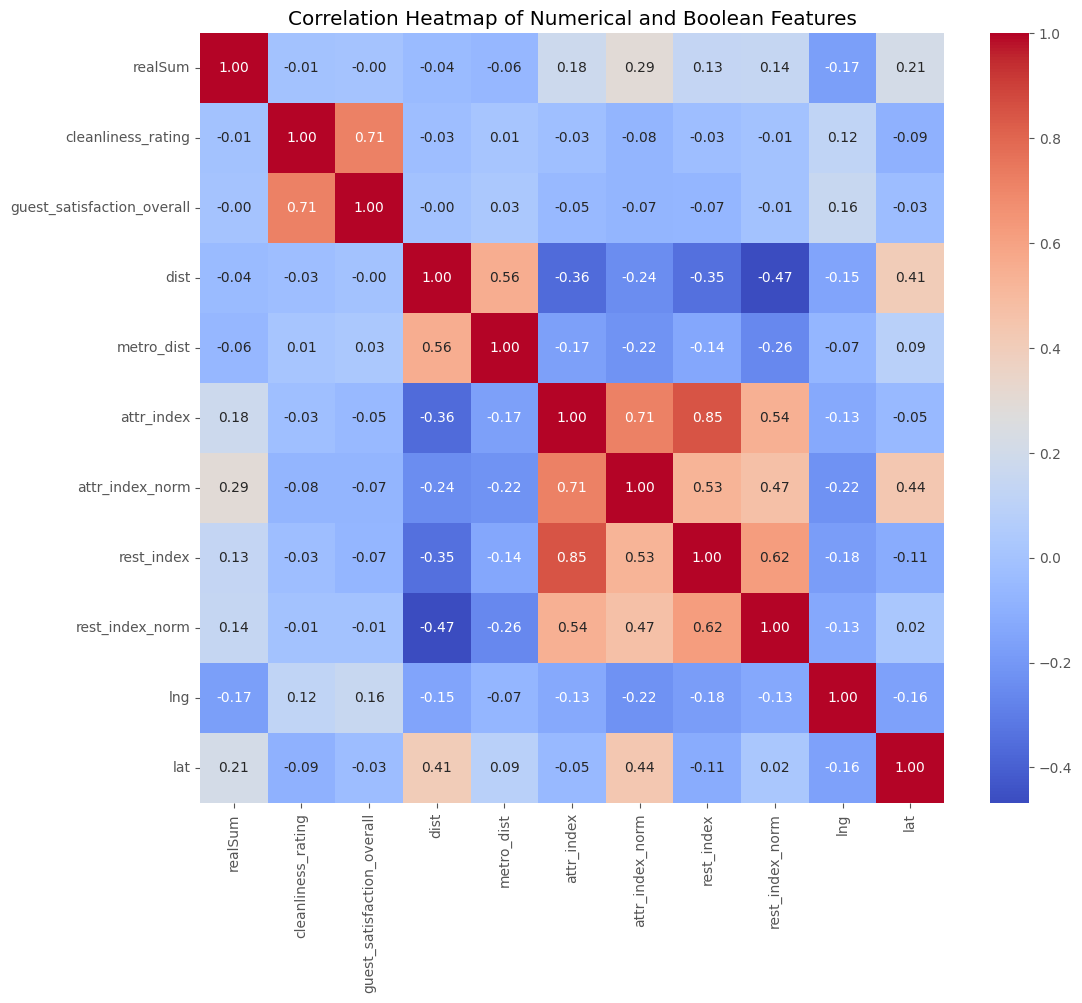

In [ ]:
# prompt: code to make correlation heatmap from all  numerical and bool column df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[nums_col].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical and Boolean Features')
plt.show()

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

Hasil observasi multivariate analysis:

### A. Korelasi antara masing-masing fitur dan label (`realSum`)
- **Fitur dengan korelasi kuat**:
  - `attr_index_norm` (korelasi sebesar 0.29).
  - `lat` (korelasi sebesar 0.21).
  - `attr_index` (korelasi sebesar 0.18).

  Ketiga fitur ini memiliki hubungan positif yang cukup berarti dengan label `realSum` dibandingkan fitur lainnya, sehingga kemungkinan besar fitur-fitur ini relevan dan layak dipertahankan dalam model prediksi.

- **Fitur dengan korelasi lemah/negatif**:
 -  Korelasi sebesar 0.03 menunjukkan bahwa `guest_satisfaction_overall` hampir tidak memiliki hubungan linier dengan nilai target (realSum). Dengan kata lain, perubahan tingkat kepuasan tamu secara keseluruhan tidak signifikan dalam menentukan harga atau nilai realSum.
  - `lng` (korelasi sebesar -0.17).
  - `dist`, `metro_dist`, dan `cleanliness_rating` menunjukkan korelasi negatif terhadap label, Korelasi negatif tidak berarti fitur tidak relevan. Dalam kasus ini, dist dan metro_dist memberikan informasi penting karena menunjukkan hubungan logis dengan realSum (Semakin jauh dari pusat kota, harga kamar semakin rendah). Korelasi negatif terhadap realSum menunjukkan bahwa semakin tinggi kebersihan, nilai realSum cenderung lebih rendah.
  - Hubungan negatif justru dapat membantu model memahami pola dalam data `realSum`.

### B. Korelasi antar-fitur
- **Korelasi tinggi antar-fitur**:
  - `rest_index` dan `attr_index` memiliki korelasi sangat kuat (0.85).
  - `rest_index_norm` dan `rest_index` (0.62) juga menunjukkan hubungan yang kuat karena menunjukkan informasi yang sama.
  - `attr_index` dan `attr_index_norm` (0.71) memiliki hubungan linier yang sangat kuat karena menunjukkan informasi yang sama.
  - `guest_satisfaction_overall` dan `cleanliness_rating` berkorelasi tinggi (0.71)

- **Pola menarik**:
  - `metro_dist` berkorelasi sedang dengan `dist` (0.56). Ini menunjukkan bahwa jarak ke pusat kota dan jarak ke fitur lainnya memiliki hubungan linear yang cukup signifikan.
  - `lat` dan `dist` memiliki korelasi positif sedang (0.41), yang bisa mencerminkan lokasi geografis terhadap harga (`realSum`).

- **Fitur yang tidak berkorelasi signifikan antar satu sama lain**:
  Sebagian besar fitur lainnya memiliki korelasi kecil, sehingga tidak ada risiko multikolinearitas tinggi untuk fitur-fitur ini.


### Kesimpulan
1. **Penghapusan atau transformasi fitur**:
   - Pasangan fitur yang korelasi tinggi seperti `attr_index` dan `attr_index_norm` dipertimbangkan untuk dihapus salah satu. Untuk linear regression, `attr_index_norm` lebih disarankan karena fitur ini sudah dinormalisasi, memiliki korelasi yang sedikit lebih tinggi dengan target, dan lebih sesuai untuk model yang sensitif terhadap skala fitur.

   - Pasangan fitur yang korelasi tinggi seperti `rest_index` dan `rest_index_norm` dipertimbangkan untuk dihapus salah satu. Untuk linear regression, `rest_index_norm` lebih disarankan karena fitur ini sudah dinormalisasi, memiliki korelasi yang sedikit lebih tinggi dengan target, dan lebih sesuai untuk model yang sensitif terhadap skala fitur.

   - `rest_index` atau `attr_index` dapat dipertimbangkan untuk dihapus. `attr_index` biasanya mencerminkan kedekatan dengan atraksi lokal (seperti wisata atau landmark), yang cenderung lebih memengaruhi harga atau nilai properti

   - `guest_satisfaction_overall` dan `cleanliness_rating` salah satu dari kedua fitur ini dapat dihapus untuk mengurangi redundansi, tergantung pada relevansi terhadap target. `cleanliness_rating` lebih masuk akal untuk dipertahankan karena lebih sering menjadi faktor utama yang dapat diukur secara obyektif.
   
2. **Fitur Numerikal yang harus dipertahankan**:
- `attr_index_norm`, `lat`, `lng`, `dist`, `metro_dist`, `cleanliness_rating`  karena korelasinya menunjukkan pola hubungan yang kuat terhadap label `realSum`


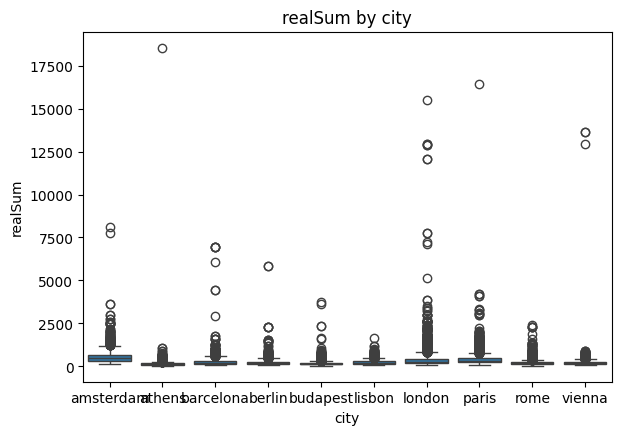

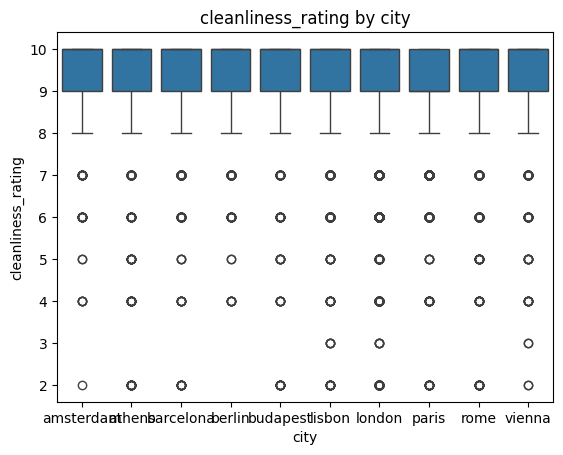

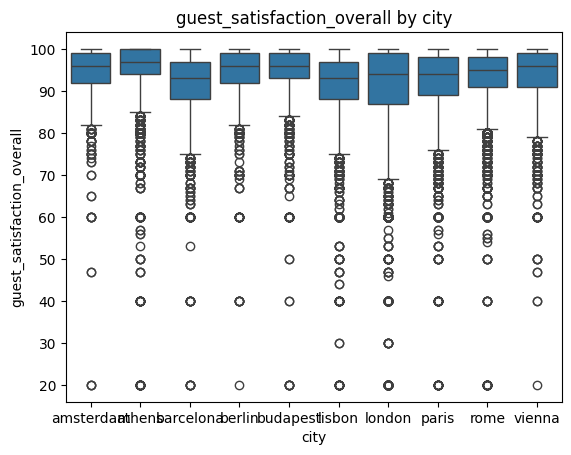

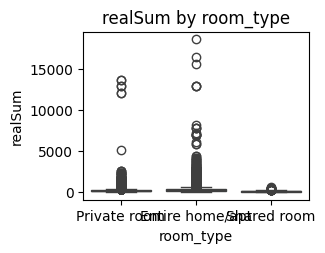

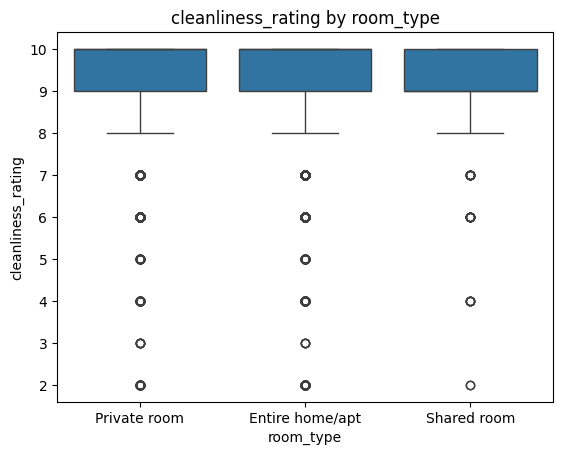

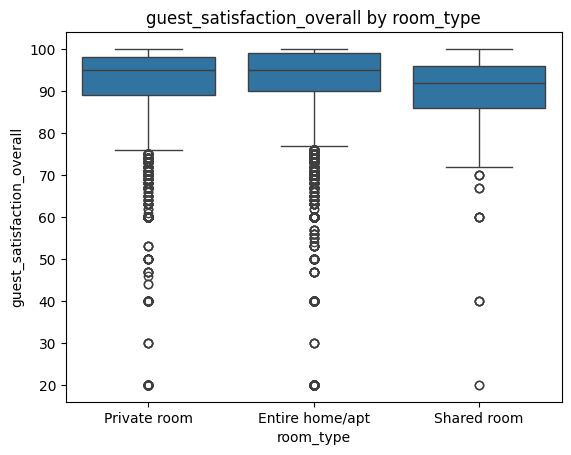

In [ ]:
# prompt: cetgorical plot to see the pattern of categorical data with other features

# Assuming df is your DataFrame and has already been loaded.

# Categorical features for plotting
categorical_features = ['city', 'room_type']

# Numerical features for comparison
numerical_features = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist','attr_index']

# Create subplots
plt.figure(figsize=(15, 10))
for i, cat_feature in enumerate(categorical_features):
  plt.subplot(2, 2, i+1)  # Adjust the number of rows and columns if needed
  for num_feature in numerical_features:
    sns.boxplot(x=cat_feature, y=num_feature, data=df)
    plt.title(f"{num_feature} by {cat_feature}")
    plt.show()

# Business Insight


<ipython-input-56-a8a2ce1feab5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='guest_satisfaction_overall', data=df, palette='viridis')


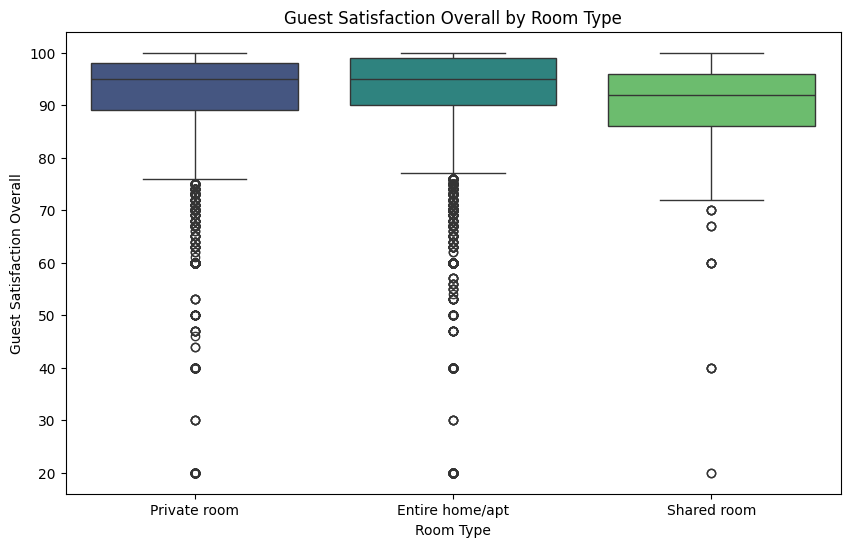

In [ ]:
# guestsatisfaction_overall & room_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='guest_satisfaction_overall', data=df, palette='viridis')
plt.title('Guest Satisfaction Overall by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Guest Satisfaction Overall')
plt.show()

**Insight:**
Bahwa tipe kamar memiliki pengaruh terhadap tingkat kepuasan pelanggan. pelanggan yang menginap di private room dan entire home/apt secara umum lebih puas dibanding dengan mereka yang menginap di shared room.

Variasi tingkat kepuasaan pelanggan antara private room dan entire home/apt relatif kecil mengindikasikan bahwa faktor lain selain tipe kamar berpengaruh dalam menentukan tingkat kepuasan pelanggan.

**Rekomendasi:**
Segmentasi Pasar yang Lebih Spesifik: Melakukan segmen pasar yang lebih memilih private room dan entire home/apt, seperti keluarga, pasangan, atau pelancong bisnis, dan sesuaikan penawaran dengan kebutuhan mereka. Sementara itu, sediakan opsi yang menarik untuk wisatawan dengan budget terbatas ketika memilih shared room.

<ipython-input-35-bb27b574b5a6>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




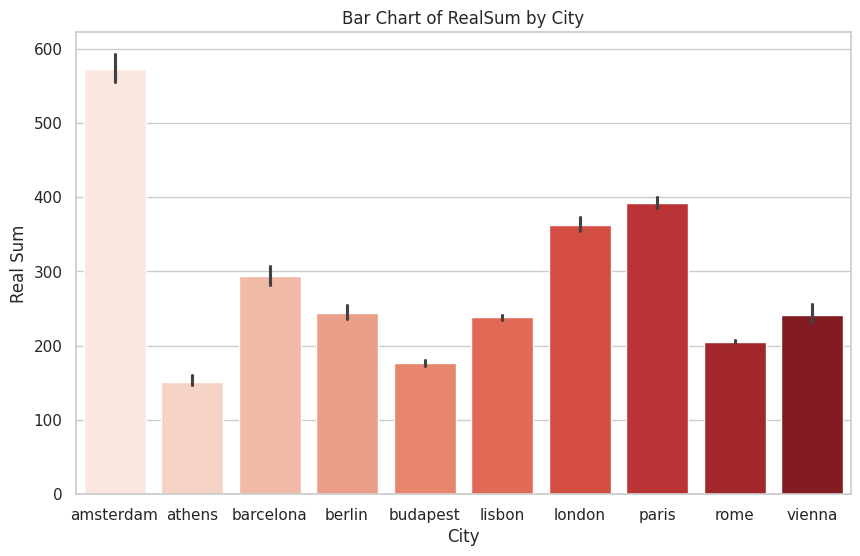

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the theme for Seaborn plots
sns.set_theme(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='city', y='realSum', data=df, palette='Reds')

# Set plot titles and labels
bar_plot.set_title('Bar Chart of RealSum by City')
bar_plot.set_xlabel('City')
bar_plot.set_ylabel('Real Sum')

# Display the plot
plt.show()

### Insight:
Dari diagram batang tersebut, kita bisa melihat hal-hal berikut:

1. **Amsterdam** memiliki **realSum** tertinggi di antara semua kota, yang menunjukkan adanya pasar atau aktivitas ekonomi yang signifikan di kota ini dibandingkan dengan kota lainnya.
2. **London** dan **Paris** juga menunjukkan nilai **realSum** yang relatif tinggi, yang menunjukkan permintaan atau kondisi ekonomi yang kuat di kedua kota tersebut.
3. **Athens** dan **Budapest** memiliki nilai **realSum** terendah, yang mungkin menunjukkan pasar yang lebih kecil atau aktivitas yang lebih rendah.
4. **Barcelona**, **Berlin**, **Lisbon**, **Rome**, dan **Vienna** menunjukkan nilai **realSum** yang sedang, menandakan kondisi ekonomi atau aktivitas pasar yang berada di tengah-tengah.

### Rekomendasi:
1. **Investasi Strategis**: Sebaiknya mempertimbangkan untuk fokus di **Amsterdam**, **London**, atau **Paris** karena aktivitas ekonomi yang signifikan di kota-kota ini.
2. **Ekspansi Pasar**: Untuk bisnis yang ingin berkembang, mengevaluasi **Barcelona**, **Berlin**,
 **Lisbon**, **Rome** dan **Vienna** sebagai area potensial untuk pertumbuhan bisa menjadi langkah yang baik, mengingat kota-kota ini menunjukkan kinerja yang cukup baik.


<ipython-input-65-33abdc800926>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='guest_satisfaction_overall', data=df, palette='viridis')


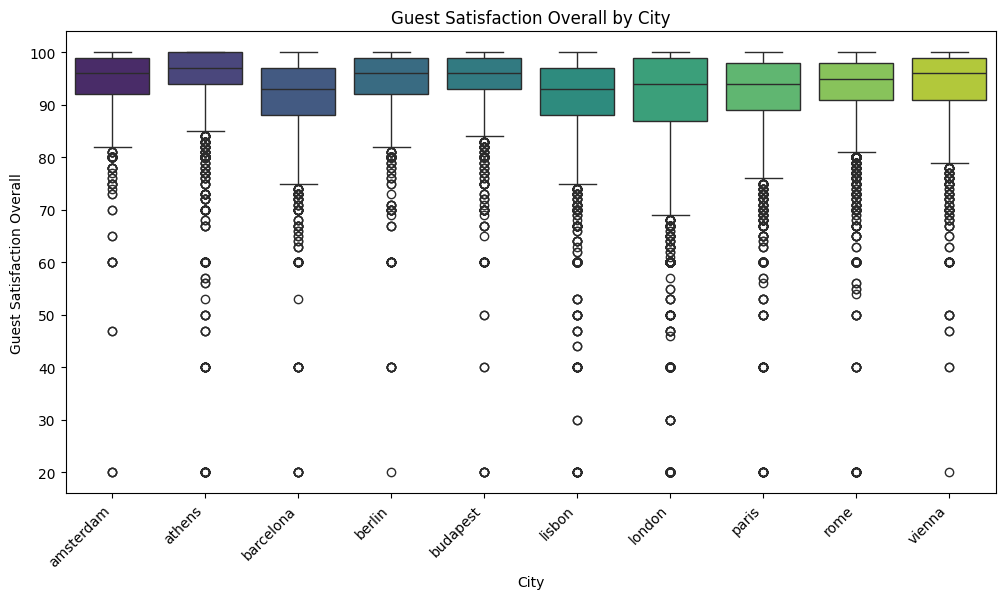

In [ ]:
# prompt: boxplot guest satisfaction overall & cities with different colors

# Assuming df is your DataFrame and has already been loaded.

plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='guest_satisfaction_overall', data=df, palette='viridis')
plt.title('Guest Satisfaction Overall by City')
plt.xlabel('City')
plt.ylabel('Guest Satisfaction Overall')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Insight**:

**Amsterdam** dan **Athena**
Menunjukkan tingkat kepuasan pelanggan yang tinggi dan konsisten sangat mendukung peningkatan loyalitas pelanggan di lokasi ini.  

**Barcelona** dan **Berlin**
Memiliki variasi tingkat kepuasan yang tinggi sehingga perlu evaluasi untuk meningktkan konsistensi layanan dan pengalaman pelanggan

**Rekomendasi**:
Kota dengan median yang tinggi (amsterdam) dapat menjadi fokus untuk mempertahankan kualitas layanan)

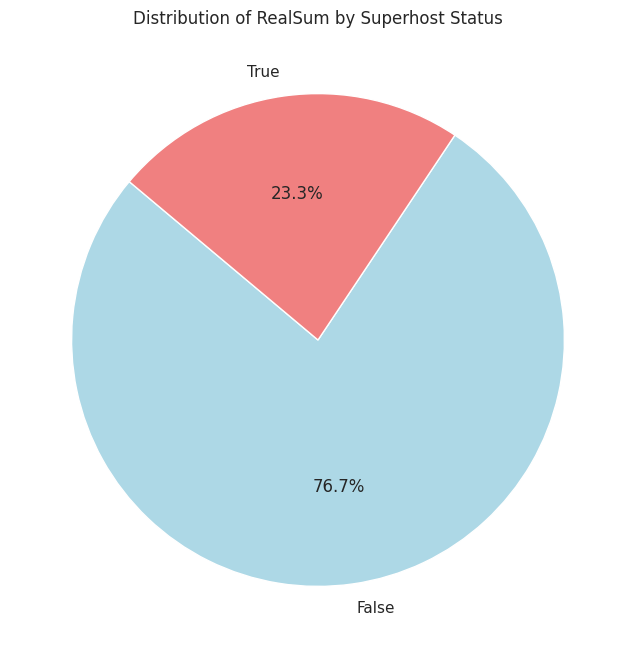

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total realSum for superhosts and non-superhosts
realSum_distribution = df.groupby('host_is_superhost')['realSum'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(realSum_distribution, labels=realSum_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])

# Set the title
plt.title('Distribution of RealSum by Superhost Status')

# Display the pie chart
plt.show()


### Insight:
Dari diagram pie di atas, dapat dilihat distribusi **`realSum`** berdasarkan status **superhost**:

1. **Superhost (True)**: Memiliki kontribusi **23.3%** dari total **realSum**, menunjukkan bahwa hanya sebagian kecil dari total nilai realSum berasal dari host yang berstatus superhost.
2. **Non-Superhost (False)**: Menghasilkan **76.7%** dari total **realSum**, menunjukkan bahwa sebagian besar nilai realSum berasal dari host yang bukan superhost.

### Rekomendasi:
**Meningkatkan Performa Non-Superhost**: Memberikan pelatihan atau panduan bagi non-superhost agar dapat meningkatkan kualitas layanan mereka, sehingga berpotensi menjadi superhost di masa depan dan meningkatkan kontribusi pendapatan.


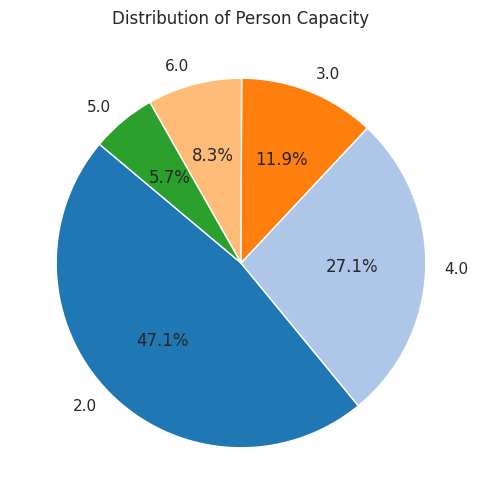

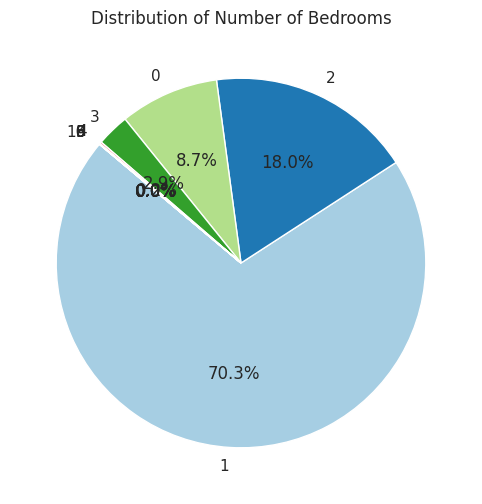

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for 'person_capacity'
person_capacity_counts = df['person_capacity'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(person_capacity_counts,
        labels=person_capacity_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors)
plt.title('Distribution of Person Capacity')
plt.show()

# Pie chart for 'bedrooms'
bedrooms_counts = df['bedrooms'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bedrooms_counts,
        labels=bedrooms_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)
plt.title('Distribution of Number of Bedrooms')
plt.show()


### **Insight**
1. **Kapasitas Akomodasi (Person Capacity):**
   - Sebagian besar kamar memiliki kapasitas kecil (1–2 orang), menunjukkan banyak pemesan individu atau pasangan. Hal ini sesuai dengan tren solo trip atau staycation.
   - Properti dengan kapasitas besar (3 orang atau lebih) relatif lebih sedikit, yang berarti pasar untuk grup atau keluarga belum terlalu banyak terlayani.

2. **Jumlah Kamar Tidur (Bedrooms):**
   - Sebagian besar properti hanya memiliki 1 kamar tidur, yang cocok untuk pasangan atau wisatawan solo.
   - Properti dengan lebih dari 2 kamar tidur jumlahnya sedikit, sehingga pasar untuk keluarga besar atau grup wisata kemungkinan kurang memiliki pilihan akomodasi.

### **Rekomendasi Bisnis**
1. **Paket Spesial untuk Grup:** Tawarkan diskon atau paket khusus untuk grup besar sebagai strategi untuk menarik segmen ini.

2. **Segmentasi Pasar yang Lebih Tepat:**
   - **Fokus pada Pasangan dan Solo Traveler:** Optimalkan properti kecil dengan promosi melalui platform digital seperti media sosial atau blog yang banyak digunakan oleh wisatawan muda dan pasangan.
   - **Garap Segmen Premium:** Sediakan properti dengan kapasitas besar dan fasilitas eksklusif seperti kolam renang pribadi atau area keluarga yang nyaman, untuk menarik pasar high-end.

3. **Tingkatkan Fasilitas Properti:**
   - Untuk kamar kecil: Fokus pada fasilitas yang mendukung kenyamanan seperti Wi-Fi cepat, desain modern, atau lokasi dekat pusat kota.
   - Untuk kamar besar: Tambahkan fasilitas seperti area parkir, dapur lengkap, atau ruang bermain anak yang cocok untuk keluarga.

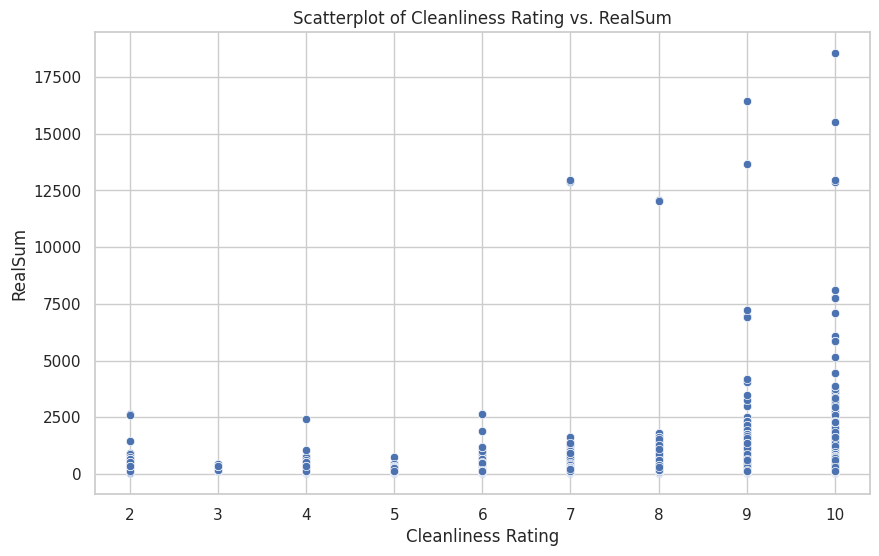

In [ ]:
# prompt: scatterplot cleanliness rating & realsum

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cleanliness_rating', y='realSum', data=df)
plt.title('Scatterplot of Cleanliness Rating vs. RealSum')
plt.xlabel('Cleanliness Rating')
plt.ylabel('RealSum')
plt.show()

### **Insight:**
1. **Cleanliness Rating Tinggi Berkorelasi dengan RealSum Lebih Tinggi**  
   - Pada rating kebersihan **9** dan **10**, terdapat data dengan nilai **RealSum** yang jauh lebih tinggi dibandingkan rating kebersihan yang lebih rendah.
   - Ini menunjukkan bahwa pelanggan bersedia membayar lebih untuk kamar dengan kebersihan yang sangat baik.

### **Rekomendasi Bisnis:**
1. **Prioritaskan Kebersihan untuk Meningkatkan Nilai Bisnis**  
   - Fokus untuk meningkatkan kebersihan layanan atau properti sehingga mendapat rating **9** atau **10**.
   - Dengan rating kebersihan tinggi, bisnis dapat menetapkan tarif premium karena pelanggan terbukti bersedia membayar lebih.

2. **Promosikan Kebersihan sebagai Nilai Jual Utama**  
   - Gunakan rating kebersihan tinggi dalam materi pemasaran dan kampanye iklan untuk menarik pelanggan.
   - Dorong pelanggan untuk memberikan ulasan terkait kebersihan, sehingga dapat meningkatkan reputasi layanan.

In [ ]:
import plotly.express as px
import pandas as pd

# Menghitung kuartil dan IQR
Q1 = df['realSum'].quantile(0.25)
Q3 = df['realSum'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk outlier
outliers = df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)]

# Membuat histogram distribusi harga
fig = px.histogram(
    df,
    x='realSum',
    nbins=50,
    title='Distribusi Harga (realSum) dengan Outlier dan Garis Distribusi',
    labels={'realSum': 'Harga (realSum)'},
    color_discrete_sequence=['blue'],
    marginal='violin'  # Menambahkan visualisasi marginal untuk distribusi tambahan
)

# Menambahkan garis distribusi KDE
fig.add_scatter(
    x=df['realSum'],
    y=[0] * len(df['realSum']),
    mode='lines',
    line=dict(color='green', width=2),
    name='Distribusi KDE'
)

# Menambahkan garis vertikal untuk outlier
fig.add_vline(x=lower_bound, line_dash="dot", line_color="red", annotation_text="Lower Outlier", annotation_position="top left")
fig.add_vline(x=upper_bound, line_dash="dot", line_color="green", annotation_text="Upper Outlier", annotation_position="top right")

# Menambahkan data outlier sebagai titik di histogram
fig.add_scatter(
    x=outliers['realSum'],
    y=[0] * len(outliers),
    mode='markers',
    marker=dict(color='red', size=10),
    name='Outliers'
)

# Menampilkan grafik
fig.update_layout(
    xaxis_title='Harga (realSum)',
    yaxis_title='Frekuensi',
    bargap=0.1,
    yaxis_tickformat=',',  # Mengatur format y-axis agar tidak menggunakan 'k' atau format besar
    template='plotly_white'
)

fig.show()


**Insight**
Harga berada di antara 0-500
Tingginya frekuensi pada rentang tersebut mayoritas properti yang terdaftar memiliki harga yang terjangkau pada target pasar atau fokus pelayanan ekonomi atau menengah.  

Rekomendasi:
Untuk properti Harga Tinggi
- Optimalisasi Premium, properti dengan harga tinggi bisa mendapatkan perhatian lebih dalam strategi pemasaran khusus.
trategi Pemasaran Eksklusif:
- Kolaborasi dengan Influencer Premium:
Gandeng influencer atau selebritas yang dikenal dengan gaya hidup mewah untuk mempromosikan properti.

Untuk Properti menengah:
- Investasikan lebih banyak dalam properti yang berada di rentang harga ini, karena mereka sesuai dengan permintaan pasar yang tinggi.
- Pastikan lokasi properti dekat dengan pusat kota, area wisata, atau transportasi umum untuk menambah daya tarik.